In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
import csv
import sys
sys.path.append('/storage/home/hcoda1/4/ashelby8/Manitoba/pyNab/src/')
import nabPy as Nab

In [2]:
%%time

runNumber = 1374
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 7 s, sys: 19.6 s, total: 26.6 s
Wall time: 15min 26s


In [3]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

CPU times: user 31.4 s, sys: 1.06 s, total: 32.5 s
Wall time: 17.9 s


In [4]:
type(results)

nabPy.resultFileClass.resultFile

In [5]:
results.resetCuts()
results.defineCut('energy', 'between', 583.20802273, 605.9849158)
cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

In [6]:
run.singleWaves().headers()

,result,eventid,bc,timestamp,req,source,length,board,channel,unix timestamp,pixel
257,1,48,17,872892242,878684890,0,7000,2,1,4.108105e+17,76
1814,1,353,17,6639450142,6644045744,0,7000,2,1,4.108105e+17,76
3371,1,660,17,12284433064,12290121338,0,7000,2,1,4.108105e+17,76
7601,1,1489,17,26992189754,26997868922,0,7000,2,1,4.108106e+17,76
8564,1,1679,17,30847967602,30853604970,0,7000,2,1,4.108106e+17,76
...,...,...,...,...,...,...,...,...,...,...,...
789173,1,152217,17,2607766398408,2607811247948,0,7000,2,1,4.108131e+17,76
789510,1,152283,17,2609219614890,2609265316696,0,7000,2,1,4.108131e+17,76
790263,1,152435,17,2611775805722,2611819925066,0,7000,2,1,4.108131e+17,76
790783,1,152537,17,2613751273108,2613796693356,0,7000,2,1,4.108131e+17,76


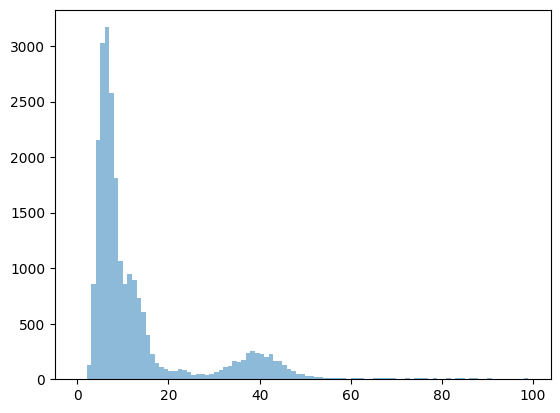

In [7]:
results.resetCuts()
# plt.hist(results.data()['energy'],bins=np.arange(585, 607),alpha=0.5)
plt.hist(results.data()['energy'],bins=np.arange(0, 100),alpha=0.5)
# plt.axvline(87)
# plt.axvline(101)
# plt.xlim(50,110)
# plt.ylim(0,10000)
plt.show()

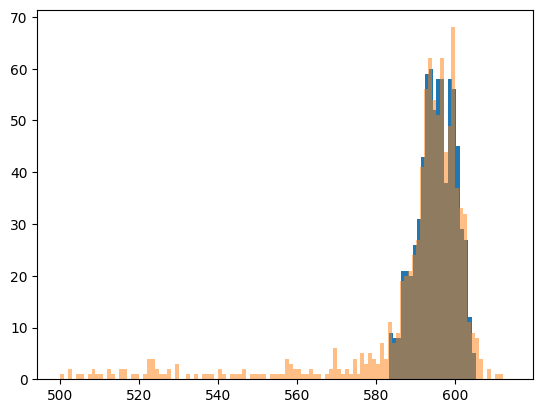

In [8]:
results.resetCuts()
plt.hist(results.data()['energy'],bins=np.arange(583.20802273, 605.9849158))
plt.hist(results.data()['energy'],bins=np.arange(500, 615),alpha=0.5)
# plt.axvline(87)
# plt.axvline(101)
# plt.xlim(50,110)
# plt.ylim(0,10000)
plt.show()

199

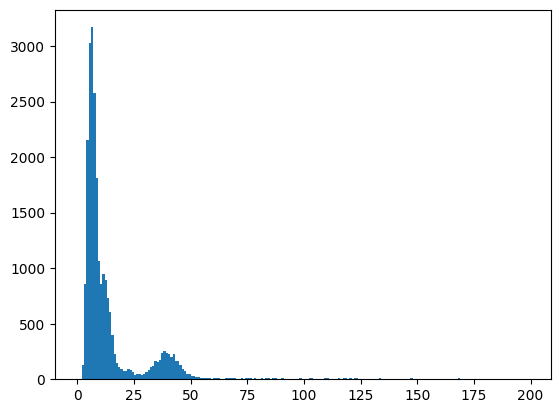

In [9]:
bins=np.arange(0, 200)
len(plt.hist(results.data()['energy'],bins=np.arange(0, 200))[0])

In [10]:
waves = run.singleWaves().waves()

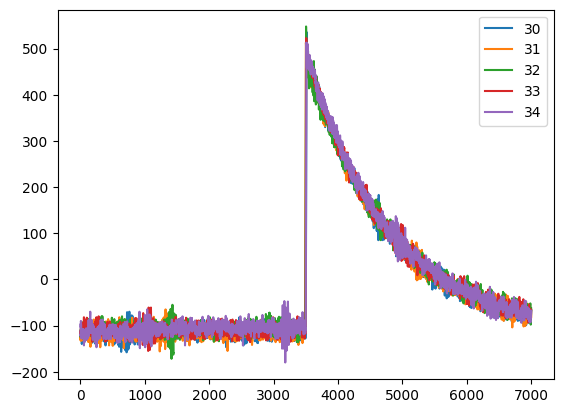

In [11]:
for i in range(30,35):
    plt.plot(waves[i],label = '%d'%i)
    
# plt.plot(waves[26])
plt.legend()
plt.show()

In [12]:
def wave_func(x, a,b,c,d,e,f):
    return a + b*x + c*x**2.0 + d*np.exp(-(x-e)/1250.0) / (1.0 + np.exp(-(x-e)/f))

In [13]:
def wave_fit(wave, func, pretrig=3000,p0=None):
    # print(wave,'wave')
    # print(pretrig,'pretrig')
    # print(len(wave),'len')
    xdata = np.arange(0,len(wave))
    
    # print(xdata,'x')
    
    prewave = wave[0:int(pretrig)]
    
    # print(prewave,'prewave')
    
    base = np.average(prewave)
    
    # print(base,'base')
    
    ydata = wave - base
    
    # print(ydata,'y')
    
    if p0 == None:
        popt, pcov = curve_fit(func, xdata, ydata,maxfev=4000)
    
    else:
        try:
            popt, pcov = curve_fit(func, xdata, ydata, p0)
        except Exception as e:
            plt.plot(wave)
            return 0,0
    # print(popt,'t')
    # print(pcov,'v')
    
    return func(xdata, *popt)+ base, popt

In [14]:
def risetime(wave,fit_mid,low=0.1, high=0.9,pretrigger=[3000,3400], cut=0,max_delay=0, max_length=50):
    try:
        shift = np.mean(wave[pretrigger[0]:pretrigger[1]])
        wave = wave - shift
        if max_delay == 0:
            maxval = np.max(wave)
        else:
            maxval = np.mean(wave[3500+max_delay:3500+max_delay+max_length])

    #     plt.axhline(maxval,color='orange')
    #     print(maxval)

        wave = wave[cut:]
        xs = np.arange(len(wave))*4

        upperCross = maxval * high
        lowerCross = maxval * low
    #     print(maxval)

        x = np.arange(0,7000)
    #     plt.axvline(fit_mid,color='black')
    #     plt.plot(x[3470:3570],wave[3470:3570])
    #     plt.axvline(upperCross,color = 'red')
    #     plt.axvline(lowerCross,color = 'green')

        upCrossPoint = np.argwhere(wave[int(fit_mid):]>upperCross)[0][0]+int(fit_mid)
    #     upCrossPoint = np.argwhere(wave[int(fit_mid):]>upperCross)[0][0]+int(fit_mid)
        lowCrossPoint = np.argwhere(wave[:int(fit_mid)]<lowerCross)[-1][0]+1

    #     plt.axvline(upCrossPoint,color = 'red')
    #     plt.axvline(lowCrossPoint,color = 'green')
    #     print(lowerCross)
    #     print(upCrossPoint,lowCrossPoint)
        upper = np.interp(upperCross, wave[upCrossPoint-1:upCrossPoint+1], xs[upCrossPoint-1:upCrossPoint+1])
        lower = np.interp(lowerCross, wave[lowCrossPoint-1:lowCrossPoint+1], xs[lowCrossPoint-1:lowCrossPoint+1])
        # print(l)
    #     print(upper)
    #     print(lower)
        return upper-lower, [lower/4+cut, upper/4+cut, maxval+shift]
    except:
        plt.plot(wave)
        # plt.xlim(3400,3600)
        plt.show()
        return 0 , [0,0,0]

In [35]:
def risetime1(wave,low=0.1, high=0.9,pretrigger=[3000,3400], cut=0,max_delay=0, max_length=50):
    
    shift = np.mean(wave[pretrigger[0]:pretrigger[1]])
    wave = wave - shift
    if max_delay == 0:
        maxval = np.max(wave)
    else:
        maxval = np.mean(wave[3500+max_delay:3500+max_delay+max_length])
        
#     plt.axhline(maxval,color='orange')
#     print(maxval)
    
    wave = wave[cut:]
    xs = np.arange(len(wave))*4
    
    upperCross = maxval * high
    lowerCross = maxval * low
#     print(maxval)
    
    x = np.arange(0,7000)
#     plt.axvline(fit_mid,color='black')
#     plt.plot(x[3470:3570],wave[3470:3570])
#     plt.axvline(upperCross,color = 'red')
#     plt.axvline(lowerCross,color = 'green')

    upCrossPoint = np.argwhere(wave>upperCross)[0][0]
#     upCrossPoint = np.argwhere(wave[int(fit_mid):]>upperCross)[0][0]+int(fit_mid)
    lowCrossPoint = np.argwhere(wave[:3600]<lowerCross)[-1][0]+1
    
#     plt.axvline(upCrossPoint,color = 'red')
#     plt.axvline(lowCrossPoint,color = 'green')
#     print(lowerCross)
#     print(upCrossPoint,lowCrossPoint)
    upper = np.interp(upperCross, wave[upCrossPoint-1:upCrossPoint+1], xs[upCrossPoint-1:upCrossPoint+1])
    lower = np.interp(lowerCross, wave[lowCrossPoint-1:lowCrossPoint+1], xs[lowCrossPoint-1:lowCrossPoint+1])
    # print(l)
#     print(upper)
#     print(lower)
    return upper-lower, [lower/4+cut, upper/4+cut, maxval+shift]

In [36]:
# shift = np.mean(wave1[3000:3400])
# wave1 = wave1-shift
# np.argwhere(wave1[int(a1[1][4]):]>100)[-1]

In [ ]:
x = np.arange(0,7000)

wave = waves[50].compute()
wave1 = waves[500].compute()
wave2 = waves[600].compute()

plt.plot(x, wave)
plt.plot(x, wave1)
plt.plot(x, wave2)
plt.show()

In [ ]:
a = wave_fit(wave,wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
a1 = wave_fit(wave1,wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
a2 = wave_fit(wave2,wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])

In [ ]:
plt.plot(x[3450:3600], wave2[3450:3600])
# plt.xlim(1640,1670)
# plt.ylim(4600,5300)
plt.plot(x[3450:3600],a2[0][3450:3600])
plt.show()

In [ ]:
%%time
fit_results = []
for i in range(len(waves)):
    fit_results.append(wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10]))

In [ ]:
x = np.arange(0,7000)
for i in range(5):
#     plt.plot(waves[i].compute())
    # plt.plot(wave_func(x,*fit_results[0][1]))
    plt.plot(fit_results[i][0])

In [ ]:
def wave_oscill(x, a,b,c,d,e,f):
    return a + b*x + c*x**2.0 + d*np.exp(-(x-e)/1250.0) / (1.0 + np.exp(-(x-e)/f))
def oscill(x,a,b,c,d):
    
    return a*np.sin(b*x + c)**2+d

In [ ]:
# xdata = np.arange(3440,3560)
# par, err = curve_fit(wave_oscill, xdata, wave1[3440:3560],maxfev=8000,p0=[0.02,2e-5,2e-8,100,3500,2,25,0.3,-10])

# xdata = np.arange(3440,3560)
# par1, err = curve_fit(oscill, xdata, wave1[3440:3560],maxfev=8000,p0=[20,0.28,300,-8])


In [ ]:
# def fourier(x, *params):
#     params = np.array(params).reshape(-1,3)
#     a = params[:, 0]
#     b = params[:, 1]
#     c = params[:, 2]
#     ret = a[0] * np.sin(np.pi / b[0] * x)+ c[0]
#     for deg in range(1, len(a)):
#         ret += a[deg] * np.sin((deg+1) * np.pi / b[deg] * x)+ c[0]
#     return ret

# def fourier_expo(x,*params):
# #     print(params[:-3])
#     return fourier(x,*([params[-3:]]*10)) + wave_oscill(x,*params[:-3])
# # num fourier terms
# xdata = np.arange(3300,3440)
                   
# params, covariance = curve_fit(fourier, xdata, wave1[3300:3440], maxfev=50000,p0=[-0.2,0.8,-0.8]*40)
                   
                   
                   

In [ ]:
# terms = 30
# Y = np.fft.fft(wave1[3440:3490])

# np.put(Y, range(terms+1, len(wave1[3440:3490])), 0.0) # zero-ing coefficients above "terms"
# y_Fourier_1 = np.fft.ifft(Y)

# time   = np.linspace(3440,3560,3000)
# f_signal = np.fft.fft(wave1[3440:3560])
# W = np.fft.fftfreq(wave1[3440:3560].size, d=time[1]-time[0])

# cut_f_signal = f_signal.copy()
# cut_f_signal[(W<0.7)] = 0.0
# cut_f_signal[(W>1.7)] = 0.0
# cut_signal = np.fft.ifft(cut_f_signal)

# terms = 60
# Y1 = np.fft.fft(wave1[3505:3560])
# np.put(Y1, range(terms+1, len(wave1[3505:3560])), 0.0) # zero-ing coefficients above "terms"
# y_Fourier_2 = np.fft.ifft(Y1)

# x1 = np.arange(3440,3490)
# x2 = np.arange(3505,3560)
# x = np.arange(3440,3560)
# plt.plot(x,wave1[3440:3560],label = 'wave')
# plt.plot(x,cut_signal,label='cut')
# plt.plot(x,wave1[3440:3560]-cut_signal,label='wave-cut')
# # # plt.xlim(3440,3560)
# # plt.ylim(-175,20)
# # # plt.ylim(-17.5e7,20e7)
# # # plt.plot(x,a1[0][3440:3560])
# # plt.plot(x,wave_oscill(x,*par),label = 'func')
# # plt.plot(x,oscill(x,*par1),label = 'sin')
# # # plt.plot(x,wave_oscill(x,*par)+oscill(x,*par1),label = 'fun-sin')
# # plt.plot(x,wave1[3505:3560]-y_Fourier_2,label = 'wave-sin')
# # plt.plot(x1,y_Fourier_1)
# # plt.plot(x2,y_Fourier_2)
# # plt.plot(x,fourier(x,*params))

# plt.legend()
# plt.show()

In [ ]:
risetime(wave1,fit_mid=a1[1][4])

In [ ]:
# risetimeDistribution1 = []
func, par = wave_fit(waves[0].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
risetime(waves[0].compute(),fit_mid=par[4],low=0.1, high=0.9)

In [15]:
%%time 

risetimeDistribution1 = []
# risetimeDistribution2 = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    time_mid.append(par[4])
    risetimeDistribution1.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])
#     risetimeDistribution2.append(risetime(waves[i].compute(),par[4],low=0.2, high=0.8)[0])

CPU times: user 23.6 s, sys: 110 ms, total: 23.7 s
Wall time: 23.6 s


In [16]:
%%time
run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 87)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between',585.2711969389492, 607.903407760068)
cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)
waves = run.singleWaves().waves()

CPU times: user 36.1 s, sys: 1.85 s, total: 37.9 s
Wall time: 14.3 s


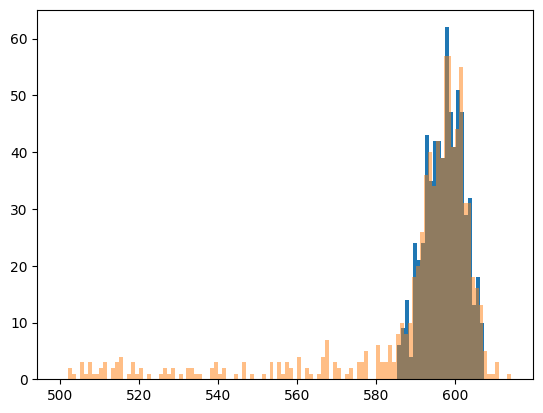

In [17]:
results.resetCuts()
plt.hist(results.data()['energy'],bins=np.arange(585.2711969389492, 607.903407760068))
plt.hist(results.data()['energy'],bins=np.arange(500, 615),alpha=0.5)
plt.show()

In [18]:
risetimeDistribution2 = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    time_mid.append(par[4])
    risetimeDistribution2.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

In [19]:
%%time
run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 97)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])
results.resetCuts()
results.defineCut('energy', 'between',579.099661626211, 602.9766247659343)
cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)
waves = run.singleWaves().waves()

CPU times: user 32.8 s, sys: 1.46 s, total: 34.3 s
Wall time: 14 s


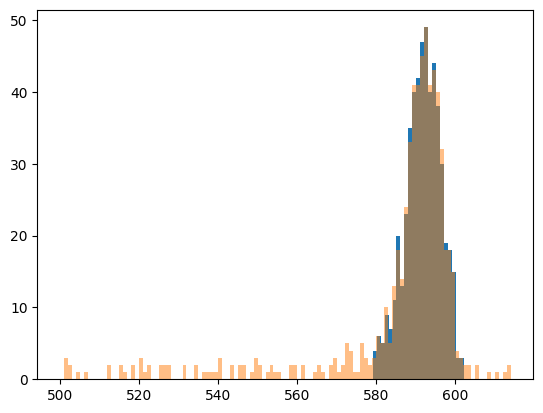

In [20]:
results.resetCuts()
plt.hist(results.data()['energy'],bins=np.arange(579.099661626211, 602.9766247659343))
plt.hist(results.data()['energy'],bins=np.arange(500, 615),alpha=0.5)
plt.show()

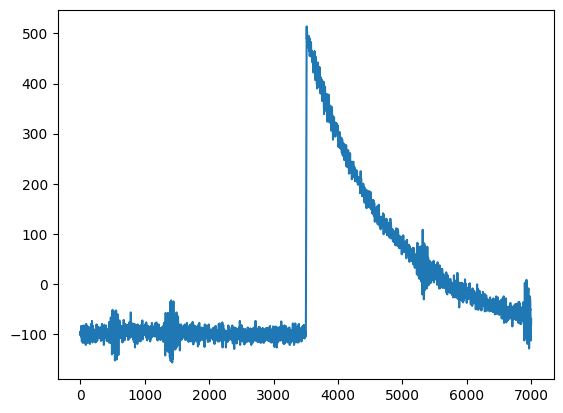

In [21]:
x = np.arange(0,7000)
plt.plot(waves[49])
# plt.plot(x,func)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


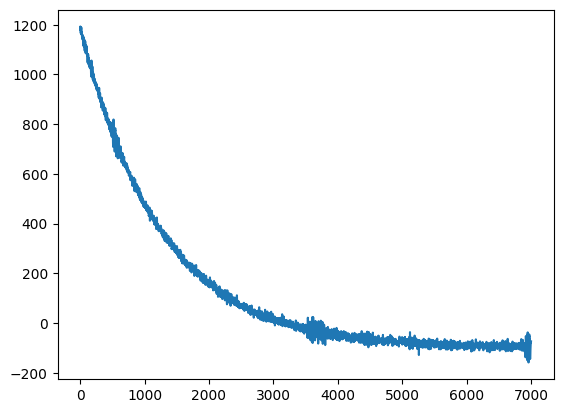

62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
32

In [22]:
risetimeDistribution3 = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    print(i)
    time_mid.append(par[4])
    risetimeDistribution3.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

In [23]:
%%time
run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 106)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])
results.resetCuts()
results.defineCut('energy', 'between',583.9355455499498, 607.6484163182787)
cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)
waves = run.singleWaves().waves()

CPU times: user 27.7 s, sys: 5.67 s, total: 33.3 s
Wall time: 13.5 s


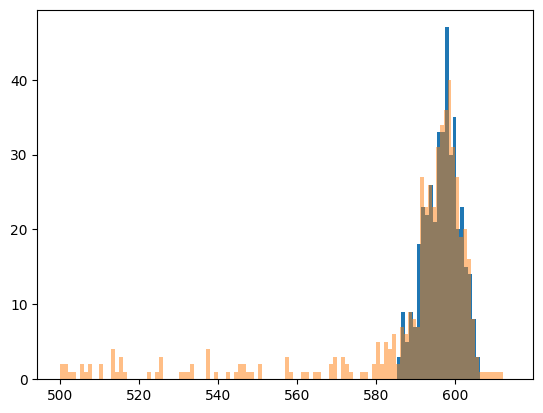

In [24]:
results.resetCuts()
plt.hist(results.data()['energy'],bins=np.arange(585.2711969389492, 607.903407760068))
plt.hist(results.data()['energy'],bins=np.arange(500, 615),alpha=0.5)
plt.show()

In [25]:
len(waves)

410

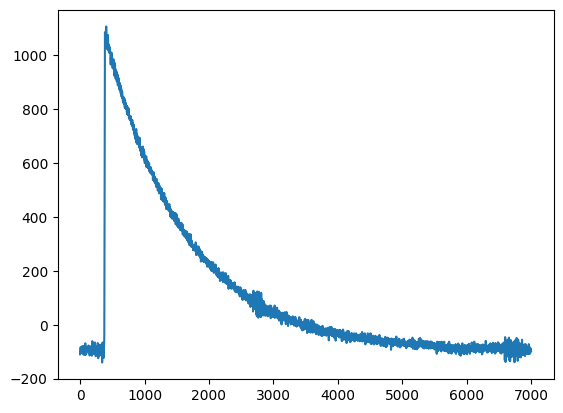

In [26]:
risetimeDistribution4 = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution4.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

In [27]:
%%time
run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 114)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])
results.resetCuts()
results.defineCut('energy', 'between',587.4604992517244, 610.4579891300249)
cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)
waves = run.singleWaves().waves()

CPU times: user 23.7 s, sys: 1.17 s, total: 24.9 s
Wall time: 12.7 s


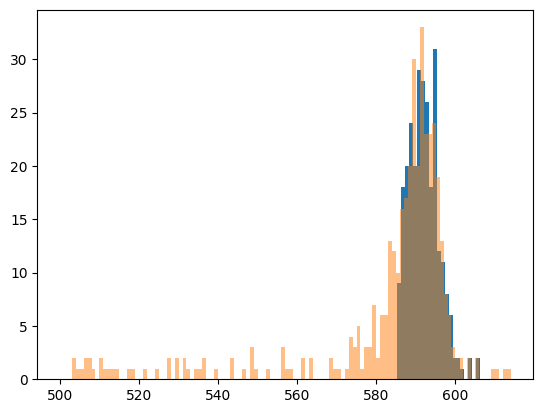

In [28]:
results.resetCuts()
plt.hist(results.data()['energy'],bins=np.arange(585.2711969389492, 607.903407760068))
plt.hist(results.data()['energy'],bins=np.arange(500, 615),alpha=0.5)
plt.show()

In [29]:
risetimeDistribution5 = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution5.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

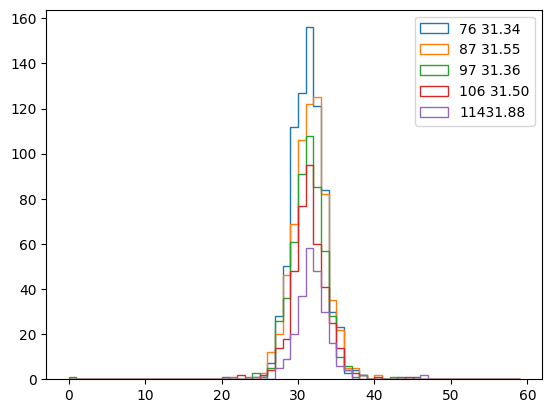

In [30]:
plt.hist(risetimeDistribution1,bins = np.arange(0,60),label = '76 %.2f'%np.mean(risetimeDistribution1),histtype='step')
plt.hist(risetimeDistribution2,bins = np.arange(0,60),label = '87 %.2f'%np.mean(risetimeDistribution2),histtype='step')
plt.hist(risetimeDistribution3,bins = np.arange(0,60),label = '97 %.2f'%np.mean(risetimeDistribution3),histtype='step')
plt.hist(risetimeDistribution4,bins = np.arange(0,60),label = '106 %.2f'%np.mean(risetimeDistribution4),histtype='step')
plt.hist(risetimeDistribution5,bins = np.arange(0,60),label = '114%.2f'%np.mean(risetimeDistribution5),histtype='step')
plt.legend()
plt.show()

In [73]:
np.mean(risetimeDistribution1)

np.float64(31.344265553062232)